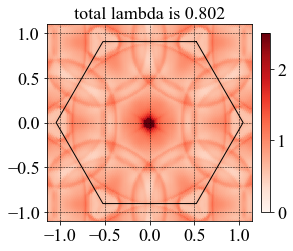

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


n = 128
m = int(n/2)
l = 2*int(n)
data = np.zeros((18, n*n))

with open('dn.dat') as fp:
    for i, line in enumerate(fp):
        item = line.split() 
        for j in range(18):
            data[j][i] = float(item[j+1])

            
data_sum = np.zeros(n*n)

for i in range(18):
    data_sum[:] +=data[i,:]

elph = np.round(sum(data_sum)/(n*n),3)


    
data2D  = data_sum.reshape(-1,n)




b1 = np.array([1.571189, 0.907126])
b2 = np.array([0.000000, 1.814253])
#bz_points=np.array([[0.907, 0.523],[0, 1.0473], [-0.907,  0.523],[-0.907, -0.523],[0, -1.0473],[0.907, -0.523],[0.907, 0.523]])
bz_points=np.array([[0.523, 0.907],[-0.523,  0.907],[-1.047, 0], [-0.523, -0.907],[0.523, -0.907],[1.047, 0],[0.523, 0.907]])




x = np.empty((n,n))
y = np.empty((n,n))
for i in range(n):
    for j in range(n):
        x[i,j]=b1[0]*(i/n) + b2[0]*(j/n) - (b1[0] + b2[0])/2
        y[i,j]=b1[1]*(i/n) + b2[1]*(j/n) - (b1[1] + b2[1])/2

        
data2D_mod = np.empty((n,n))
        
data2D_mod[:m,:m] = data2D[m:,m:]
data2D_mod[:m,m:] = data2D[m:,:m]
data2D_mod[m:,:m] = data2D[:m,m:]
data2D_mod[m:,m:] = data2D[:m,:m]



data2D_ext = np.empty((l,l))
x1 = np.empty((l,l))
y1 = np.empty((l,l))

data2D_ext[:m,m:m+n] = data2D_mod[m:,:]
data2D_ext[m:m+n,m:m+n] = data2D_mod[:,:]
data2D_ext[m+n:,m:m+n] = data2D_mod[:m,:]
data2D_ext[:,:m] = data2D_ext[:,n:m+n]
data2D_ext[:,m+n:] = data2D_ext[:,m:n]

for i in range(l):
    for j in range(l):
        x1[i,j]=b1[0]*(i/n) + b2[0]*(j/n) - (b1[0] + b2[0])
        y1[i,j]=b1[1]*(i/n) + b2[1]*(j/n) - (b1[1] + b2[1])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
im = ax.pcolor(x1,y1,data2D_ext, vmin = 0, vmax = 2.5, shading='nearest', cmap='Reds')
cbar = plt.colorbar(im, fraction=0.04, pad=0.04) 
cbar.ax.tick_params(labelsize=18)
plt.title(f'total lambda is {str(elph)}',fontsize=18)
plt.plot(bz_points[:,0], bz_points[:,1], c='k', linewidth=1)
im = ax.grid(color='black', linestyle='dashed', linewidth=0.5)
im = ax.set_aspect('equal')
ax.set_xlim([-1.15, 1.15])
ax.set_ylim([-1.1, 1.1])
plt.xticks([-1.0, -0.5, 0, 0.5, 1.0])
plt.yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.set_ylabel('qy', fontsize=18)
# ax.set_xlabel('qx', fontsize=18)




fig.savefig('dn.png', dpi=300)

